## Atividade Avaliativa 2 
Nome: Leandro Balta Braga\
Nro Matrícula: 2022004260\
\
ATENÇÃO: Renomei o arquivo para "seu_nro_matric.ipynb"

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import binom, poisson, norm

df= pd.read_csv("world_population2.csv", encoding ='latin-1')
df

,Country,Continent,Population (2020),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,Asia,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,Europe,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,Africa,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,Africa,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,North America,97929,0.84,811,223,440,0,2.0,34,26.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Vietnam,Asia,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0,1.25
195,Western Sahara,Africa,597339,2.55,14876,2,266000,5582,2.4,28,87.0,0.01
196,Yemen,Asia,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
197,Zambia,Africa,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0,0.24


Questão 1 [valor: 1,0]\
Considere o dataset "world_population2.csv". \
a) Obtenha a média, mediana e desvio padrão da taxa de fertilidade (Fert. Rate) \
b) Gere um boxplot da taxa de fertilidade por continente.

Fert. Rate mean:  2.693969849246231
Fert. Rate median:  2.3
Fert. Rate std:  1.2694800570501128


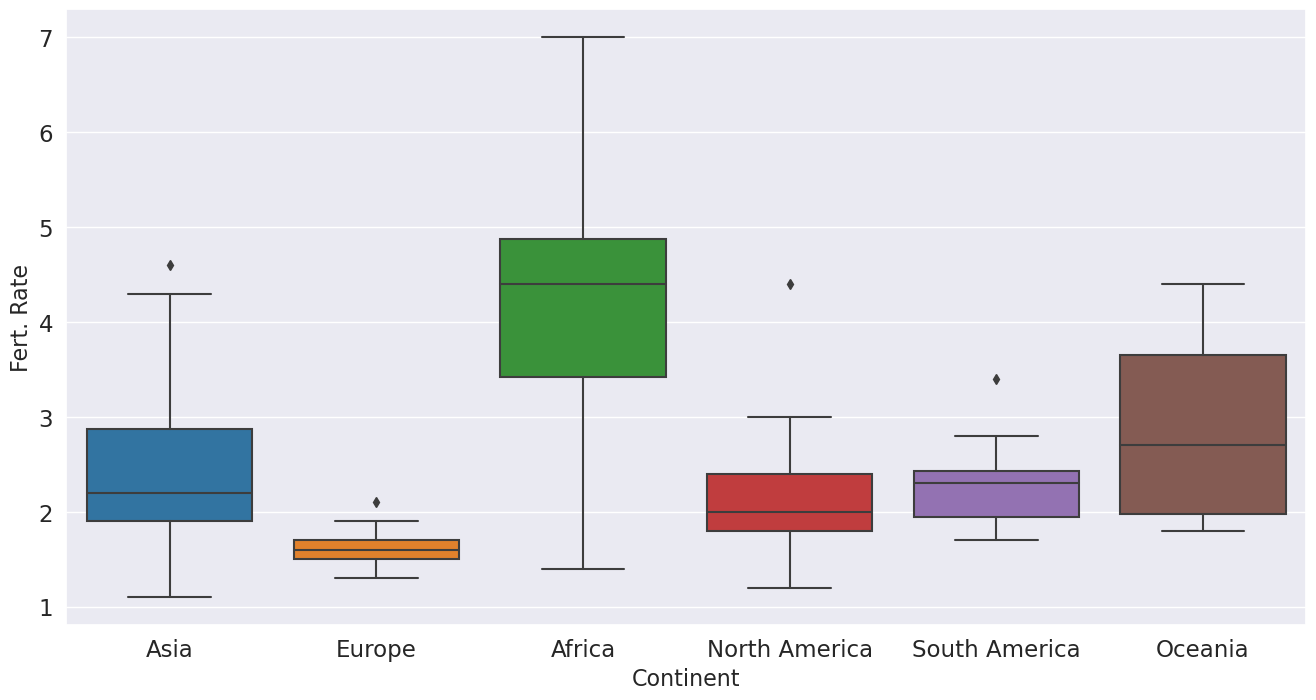

In [47]:
fert_mean = df['Fert. Rate'].mean()
fert_median = df['Fert. Rate'].median()
fert_std = df['Fert. Rate'].std()

print("Fert. Rate mean: ", fert_mean)
print("Fert. Rate median: ", fert_median)
print("Fert. Rate std: ", fert_std)

plt.rcParams['figure.figsize'] = [16,8]

sns.boxplot(x='Continent', y='Fert. Rate', data=df) 

plt.show()



Questão 2 [valor: 1,5]\
Considere o dataset "world_population2.csv". Plote um gráfico de pizza que mostre a porcentagem da 
população mundial por continente. \
Dica: use => df[['XXX', 'XXX']].groupby('XXX').aggregate(sum)

Text(0.5, 1.0, 'População por continente')

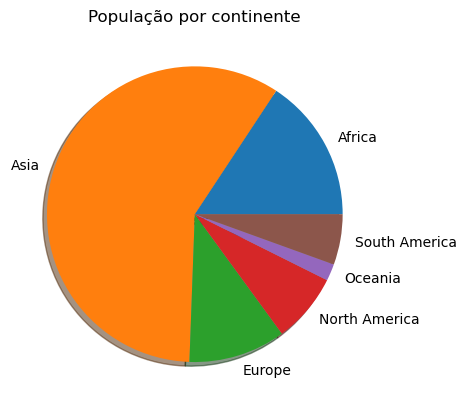

In [11]:
# df_homens = df[df['sex']=='Male']
# df_mulheres = df[df['sex']=='Female']

# sizes = [df_homens['total_bill'].sum(), df_mulheres['total_bill'].sum()]
# labels = ['Homens', 'Mulheres']
# sns.set_style("darkgrid")
# plt.pie(sizes, labels = labels)
# plt.title('Divisão do faturamento entre homens e mulheres')['Population (2020)'].sum()
# plt.axis('equal')
# plt.show()

grouped_by_continent = df.groupby('Continent')[['Population (2020)']].sum().reset_index()
population_by_continent_array = grouped_by_continent['Population (2020)'].to_numpy()
labels = grouped_by_continent['Continent'].to_numpy()

plt.pie(population_by_continent_array, labels=labels, shadow=True)
plt.title('População por continente')


Questão 3 [valor: 1,5]\
Considere o dataset "world_population2.csv". Plote um gráfico de barras que mostre a média da população urbana (Urban Pop %) por continente. \
Dica: use => df[['XXX', 'XXX']].groupby('XXX').aggregate('mean')

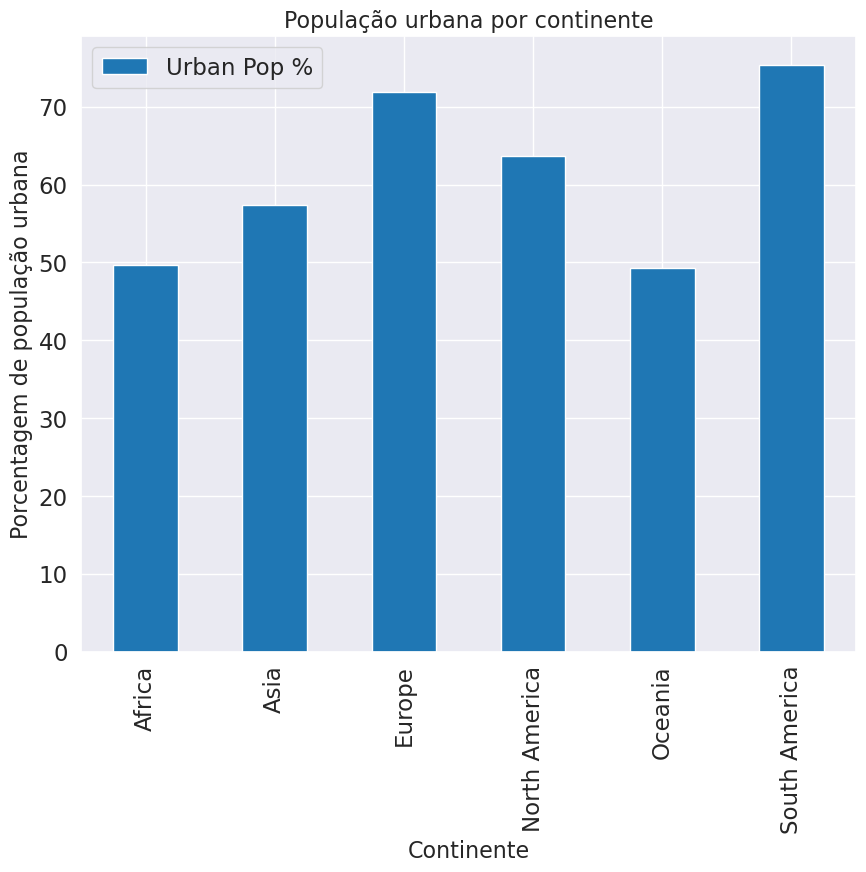

In [64]:

grouped_urban_by_continent = df.groupby('Continent')[['Urban Pop %']].mean().reset_index()
grouped_urban_by_continent

plt.rcParams['figure.figsize'] = [10,8]

grouped_urban_by_continent.plot(x='Continent', y='Urban Pop %', kind='bar')

plt.title('População urbana por continente')
plt.xlabel('Continente')
plt.ylabel('Porcentagem de população urbana')
plt.show()


Questão 4 [valor: 1,5]\
 Uma empresa vende lotes contendo 100 unidades de barras de ferro. Tendo em vista que a taxa de defeitos é de 18% e que uma amostra de 8 peças foi retirada do lote, plote a distribuição de probabilidade de termos 0, 1, 2, ..., 8 peças defeituosas na amostra.

a probabilidade de ter 0 peças defeituosas é 0.20441408586549772
a probabilidade de ter 1 peças defeituosas é 0.3589710776174593
a probabilidade de ter 2 peças defeituosas é 0.27579485231585293
a probabilidade de ter 3 peças defeituosas é 0.12108066687037446
a probabilidade de ter 4 peças defeituosas é 0.03322335371443204
a probabilidade de ter 5 peças defeituosas é 0.005834345042534403
a probabilidade de ter 6 peças defeituosas é 0.0006403549436928002
a probabilidade de ter 7 peças defeituosas é 4.01616340992e-05
a probabilidade de ter 8 peças defeituosas é 1.1019960575999996e-06


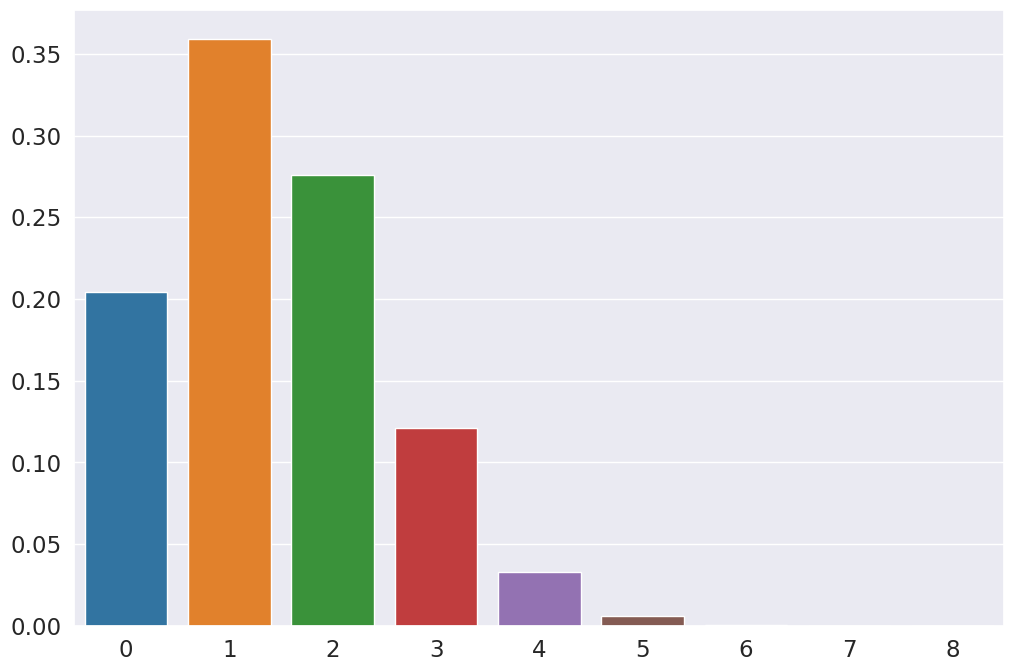

In [89]:
count = [0,1,2,3,4,5,6,7,8]

possibilities = binom.pmf(count, 8, 0.18)
type(possibilities)

for i in range(len(possibilities)):
    print(f"a probabilidade de ter {i} peças defeituosas é {possibilities[i]}")
    
plt.rcParams['figure.figsize'] = [12,8]

sns.barplot(x=count, y=possibilities)
plt.show()

Questão 5 [valor: 1,5]\
A chegada de ônibus em um terminal acontece à razão de 3 por minuto, em média. Determine a probabilidade de: \
a) Chegarem exatamente 8 ônibus em 2 minutos. \
b) Chegarem menos de 2 ônibus em 1 minuto.

In [101]:
#a
print(f"a probabilidade de chegarem exatamente 8 onibus em 2 minutos é {poisson.pmf(8, 6)}")

#b
print(f"a probabilidade de chegarem menos de 2 onibus em 1 minuto é {poisson.cdf(1, 3)}")


a probabilidade de chegarem exatamente 8 onibus em 2 minutos é 0.1032577335308442
a probabilidade de chegarem menos de 2 onibus em 1 minuto é 0.1991482734714558


Questão 6 [valor: 1,5]\
Uma fábrica produz pisos laminados com comprimento de 2.000 mm e desvio padrão de 15 mm. Simule a produção de 3.000 pisos. \
A) Obtenha 100 amostras contendo a média de 30 pisos e plote um gráfico da distribuição das médias.
B) Qual é a probabilidade de obter amostras com comprimento de 2.020 mm ou mais?

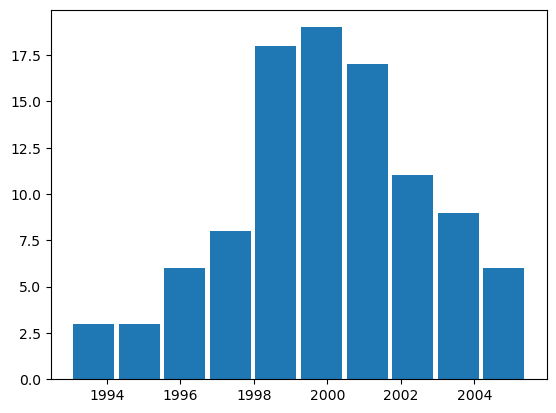

In [8]:
prod = np.random.normal(2000, 15, 3000)
matrix = prod.reshape(100, 30)
means_array = prod.reshape(100, 30).mean(axis=1)
means_array
# for item in matrix:
#     means_array.append(item.mean())
    
# print(means_array)

plt.hist(means_array, 10, rwidth=0.9)
plt.show()


In [9]:
#b
norm.sf(2020, 2000, 15) + norm.pdf(2020, 2000, 15) 

0.10214522470426746

Questão 7 [valor: 1,5]\
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão de 15 ml. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,08 e duas caudas. \
a) Obtenha o Z crítico para esse teste. \
b) Considere que tenha sido tomada uma única amostra contendo 726 ml. Obtenha o Z calc e informe o resultado do teste. \
c) Considere que tenham sido tomadas 4 amostras e a média obtida foi 736 ml. Obtenha o Z calc e informe o resultado do teste.

In [3]:

df_cenario= pd.read_csv("cenario-1semestre.csv", encoding ='latin-1')
df_cenario

,Curso,PPC,Unnamed: 2,CÃ³digo,Disciplina,CH,Prof 1,Prof 2,Prof 3,Prof 4,...,Prof 9,Prof 10,Prof 11,Prof 12,Prof 13,Prof 14,Prof 15,Prof 16,Prof 17,Prof 18
0,CCO,2022,1,XDES01,Fundamentos de ProgramaÃ§Ã£o,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,CRSC03,Arquitetura de Computadores I,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1,XMAC01,MatemÃ¡tica Discreta,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1,CAHC04,Projeto Integrado,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN
4,NaN,NaN,3,XDES02,ProgramaÃ§Ã£o Orientada a Objetos,4,NaN,NaN,NaN,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3,XDES04,Engenharia de Software I,4,X,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,3,CRSC02,Sistemas Operacionais,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3,CTCO02,Algoritmos e Estrutura de Dados II,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
8,NaN,NaN,3,XMAC02,MÃ©todos MatemÃ¡ticos para AnÃ¡lise de Dados,4,NaN,NaN,NaN,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3,CMAC03,Algoritmos em Grafos,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN
